<a href="https://colab.research.google.com/github/snehahampapura/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from numpy import math
import scipy.stats as stat
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# #Importing Dataset
dataset = pd.read_excel("/content/drive/MyDrive/Data/Online Retail.xlsx")
# dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/datasets/Online_Retail.xlsx - Online Retail.csv")

creating a copy of dataset

In [ ]:
df = dataset.copy()

#**Data Exploration**

In [ ]:
#First look of data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [ ]:
#Taking a look at statistics of the columns
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Potential data reversal.**

*  The max and min value of Quantity are both 80995; it could represent a 
reversal of data entry. However, the issue is that both the initial and reversal entry are retained in the dataset. Further investigation is needed to understand the nature and determine the best way to manage such data reversal.

**Potential indication of cancellation orders from negative UnitPrice.**

*  It is uncommon to have negative UnitPrice, as this would mean a cash outflow to a company. These transactions could represent cancelled orders by customers or bad-debt/write-off incurred by the business.

###Checking for Duplicate and Missing Values

In [ ]:
df.shape

(541909, 8)

In [ ]:
# checking for duplicate
len(df[df.duplicated()])

5268

In [ ]:
df.drop_duplicates(keep = False, inplace = True)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
#Familiarise with the columns in the dataset and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531762 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531762 non-null  object 
 1   StockCode    531762 non-null  object 
 2   Description  530308 non-null  object 
 3   Quantity     531762 non-null  int64  
 4   InvoiceDate  531762 non-null  object 
 5   UnitPrice    531762 non-null  float64
 6   CustomerID   396767 non-null  float64
 7   Country      531762 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


In [ ]:
# Finding Any Null Value Present in the data set
df.isnull().values.any()

True

In [ ]:
# Total Number Of Count Of Null Values Present In The Respective Columns
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134995
Country             0
dtype: int64

In [ ]:
df.isnull().sum()/len(df.index)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.273431
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.386357
Country         0.000000
dtype: float64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(396767, 8)

#**Exploratory Data Analysis**

##Data Preprocessing

In [ ]:
df['TotalAmount'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
df["InvoiceDate"]

0          12/1/10 8:26
1          12/1/10 8:26
2          12/1/10 8:26
3          12/1/10 8:26
4          12/1/10 8:26
              ...      
541904    12/9/11 12:50
541905    12/9/11 12:50
541906    12/9/11 12:50
541907    12/9/11 12:50
541908    12/9/11 12:50
Name: InvoiceDate, Length: 396767, dtype: object

In [ ]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396767 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396767 non-null  object        
 1   StockCode    396767 non-null  object        
 2   Description  396767 non-null  object        
 3   Quantity     396767 non-null  int64         
 4   InvoiceDate  396767 non-null  datetime64[ns]
 5   UnitPrice    396767 non-null  float64       
 6   CustomerID   396767 non-null  float64       
 7   Country      396767 non-null  object        
 8   TotalAmount  396767 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.3+ MB


In [ ]:
df['month']=df['InvoiceDate'].dt.month_name()
df['day'] = df['InvoiceDate'].dt.day_name()
df['year'] = df['InvoiceDate'].dt.year
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [ ]:
# df.drop(columns=['InvoiceDate'],axis=1,inplace=True)

In [ ]:
df.drop(columns=['year','minute'],axis=1,inplace=True)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,month,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalAmount', 'month', 'day',
       'hour'],
      dtype='object')

##Invoice Number

Invoice number is a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

Let us now look at the number of canceled orders in the data.

In [ ]:
# String to be searched in start of string 
search ="C"
  
# boolean series returned with False at place of NaN
bool_series = df["InvoiceNo"].str.startswith(search, na=False)
  
# displaying filtered dataframe
cancel_order = df[bool_series]

cancel_order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,month,day,hour
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,December,Wednesday,9
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,December,Wednesday,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,December,Wednesday,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,December,Wednesday,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,December,Wednesday,10


In [ ]:
print("Shape of cancelled order", cancel_order.shape)

Shape of cancelled order (8844, 12)


In [ ]:
cancel_order_percentage = cancel_order['InvoiceNo'].count()*100/df['InvoiceNo'].count()
cancel_order_percentage

2.229016021997797

##Country

####Top 10 Order cancelled countries

In [ ]:
cancel_order_country = cancel_order.groupby('Country')['InvoiceNo'].count().reset_index()

In [ ]:
cancel_order_country_top10 = cancel_order_country.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
# cancel_order_country_top10['Country_percent']= cancel_order_country_top10['InvoiceNo']*100/df['InvoiceNo'].count()
cancel_order_country_top10

,Country,InvoiceNo
0,United Kingdom,7474
1,Germany,453
2,EIRE,247
3,France,147
4,USA,112
5,Australia,74
6,Spain,48
7,Italy,45
8,Belgium,38
9,Japan,37


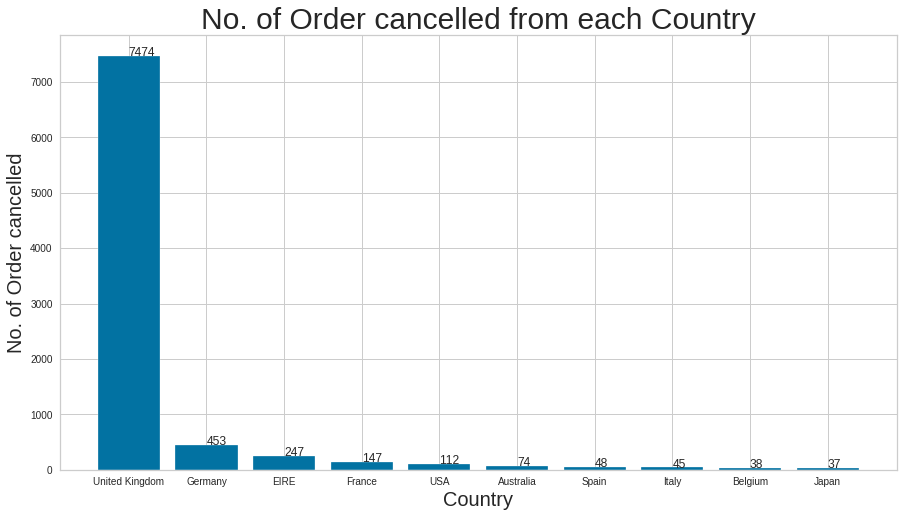

In [ ]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=cancel_order_country_top10['Country']
y=cancel_order_country_top10['InvoiceNo']

# creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,y)

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("No. of Order cancelled", size=20)
plt.title("No. of Order cancelled from each Country", size=30)

## Showing the plot
plt.show()

In [ ]:
df = df[~df.InvoiceNo.str.contains("C", na=False)]

In [ ]:
print("After removing the cancelled data the shape of final dataset is", df.shape)

After removing the cancelled data the shape of final dataset is (387923, 12)


####Top 10 countries with most orders

In [ ]:
## Apply groupby function on country and Invoice No.
country_count = df.groupby('Country')['InvoiceNo'].count().reset_index()

In [ ]:
country_count.head()

,Country,InvoiceNo
0,Australia,1183
1,Austria,398
2,Bahrain,17
3,Belgium,2031
4,Brazil,32


In [ ]:
## From country_count variable finding top 10 countries
Top_ten_country = country_count.sort_values('InvoiceNo', ascending=False, ignore_index=True).head(10)

In [ ]:
## Adding country percentage column to top 10 countries data frame
Top_ten_country['Country_percent']= Top_ten_country['InvoiceNo']*100/df['InvoiceNo'].count()
Top_ten_country

,Country,InvoiceNo,Country_percent
0,United Kingdom,344490,88.803706
1,Germany,9012,2.323141
2,France,8312,2.142693
3,EIRE,7218,1.860679
4,Spain,2475,0.638013
5,Netherlands,2363,0.609142
6,Belgium,2031,0.523558
7,Switzerland,1842,0.474837
8,Portugal,1445,0.372497
9,Australia,1183,0.304957


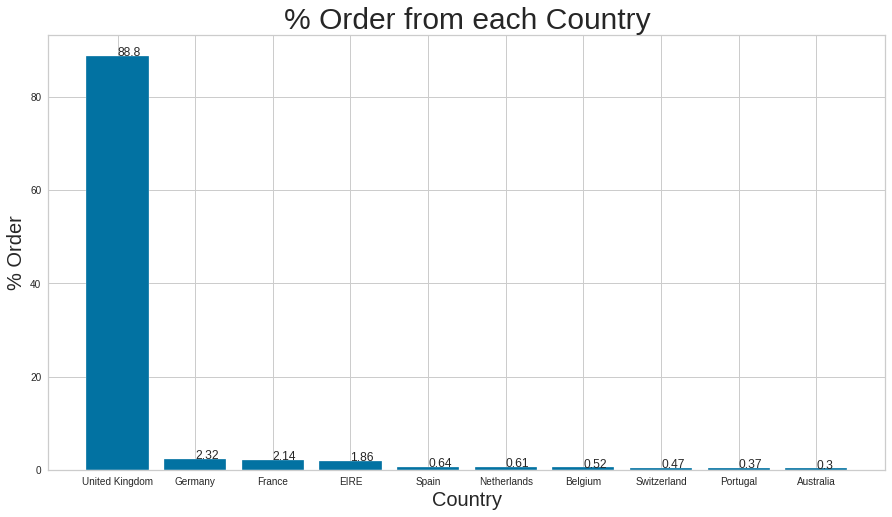

In [ ]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=Top_ten_country['Country']
y=Top_ten_country['Country_percent']

# creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,round(y,2))

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("% Order", size=20)
plt.title("% Order from each Country", size=30)

## Showing the plot
plt.show()

##CustomerID and TotalAmount

In [ ]:
#fig = plt.figure(figsize=(25, 7))
PercentSales = df.groupby(["CustomerID"]).TotalAmount.sum().sort_values(ascending = False).iloc[:20].reset_index()
PercentSales.head(10)

,CustomerID,TotalAmount
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194230.79
3,16446.0,168472.50
4,14911.0,143597.28
5,12415.0,124914.53
6,14156.0,117040.53
7,17511.0,91062.38
8,16029.0,80676.84
9,12346.0,77183.60


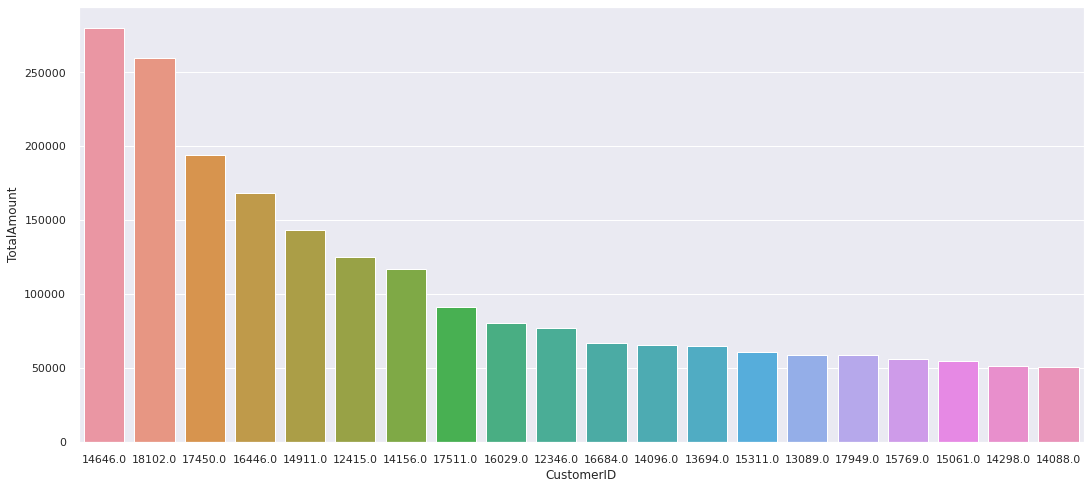

In [ ]:
sns.set(rc={'figure.figsize':(18,8)})
sns.barplot(x="CustomerID", y="TotalAmount", data=PercentSales, order=PercentSales['CustomerID'])
plt.show()

##Day

In [ ]:
day_df=df['day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,78514
1,Wednesday,67258
2,Tuesday,65072
3,Monday,63608
4,Sunday,59800
5,Friday,53671


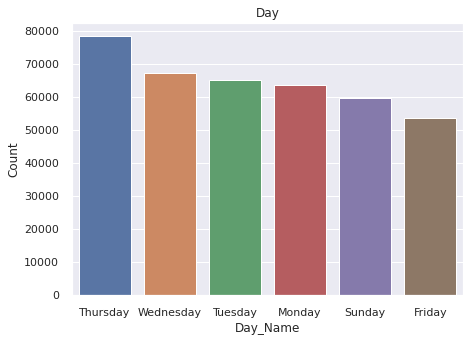

In [ ]:
plt.figure(figsize=(7,5))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)
plt.show()

Most of the customers have purches the items in Tuesday,Wednesday and Thursday.

##Month

In [ ]:
month_df=df['month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,61914
1,October,48099
2,December,41999
3,September,39335
4,May,27840
5,June,26710
6,March,26592
7,August,26586
8,July,26344
9,April,22240


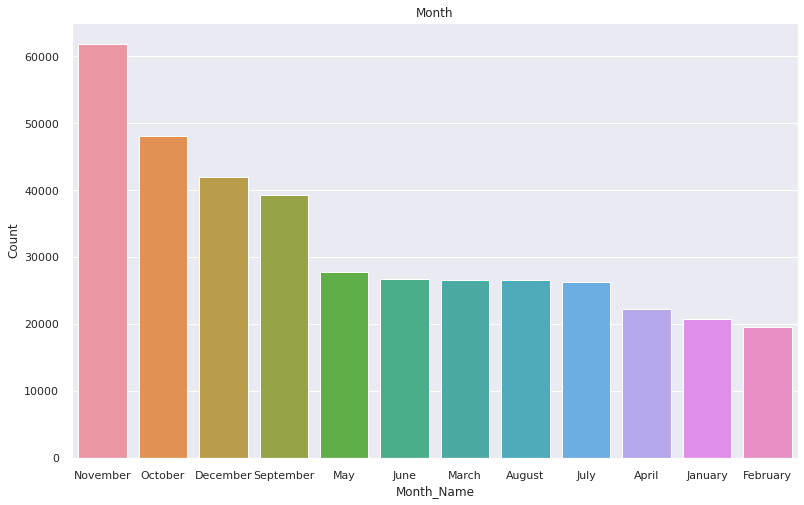

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

Most numbers of customers have purchaes the gifts in the month of September,October, November and December.

##Hour

In [ ]:
hour_df=df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

,Hour_Name,Count
0,12,69889
1,13,62081
2,14,52465
3,11,47718
4,15,44253
5,10,37569
6,16,23381
7,9,21912
8,17,12814
9,8,8685


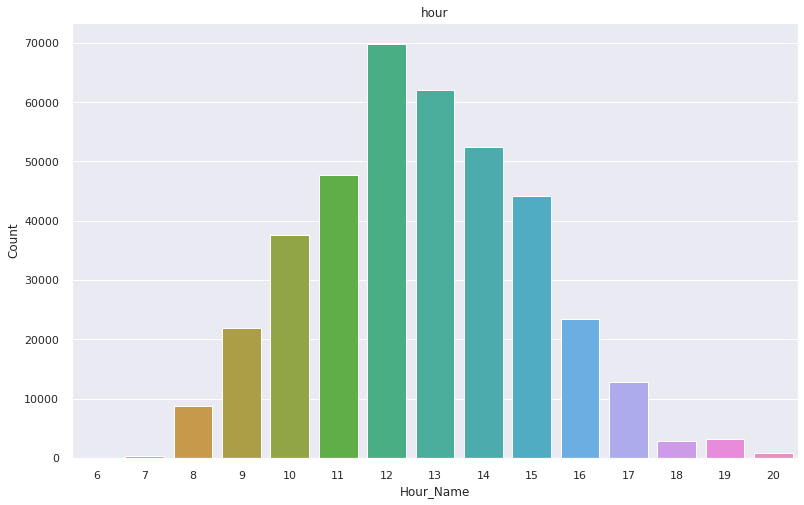

In [ ]:
plt.figure(figsize=(13,8))
plt.title('hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

We can observe that most of the purchase happens during afternoon.

In [ ]:
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16):
    return 'Afternoon'
  else:
    return 'Evening'

In [ ]:
df['Time_type']=df['hour'].apply(time_type)

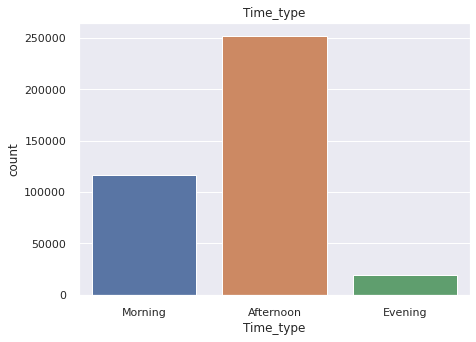

In [ ]:
plt.figure(figsize=(7,5))
plt.title('Time_type')
sns.countplot(x='Time_type',data=df)

##Description

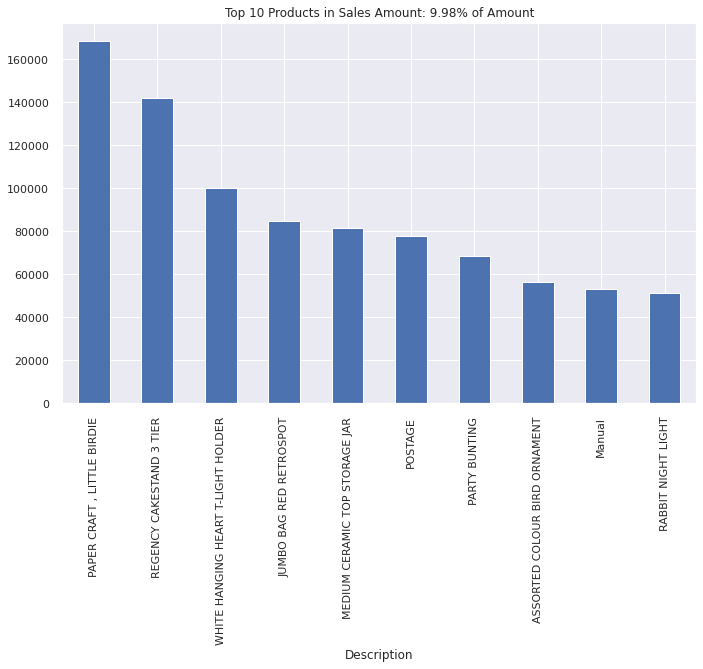

In [ ]:
AmoutSum = df.groupby(["Description"]).TotalAmount.sum().sort_values(ascending = False)
inv = df[["Description", "InvoiceNo"]].groupby(["Description"]).InvoiceNo.unique().\
      agg(np.size).sort_values(ascending = False)

fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
Top10 = list(AmoutSum[:10].index)
PercentSales =  np.round((AmoutSum[Top10].sum()/AmoutSum.sum()) * 100, 2)

g = AmoutSum[Top10].\
    plot(kind='bar', title='Top 10 Products in Sales Amount: {:3.2f}% of Amount'.\
                       format(PercentSales))

In [ ]:
df.shape

(387923, 13)

#**Building RFM model:**

Recency, Frequency, and Monetary (RFM) Segmentation

RFM is a behavioural customer segmentation for measuring customer value.

Receny: How recent was each customer's last purchase

Frequency: How many times the customer purchased in the last 12 months

Monetary Value: How much has the customer spent in the last 12 months

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,month,day,hour,Time_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December,Wednesday,8,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December,Wednesday,8,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8,Morning


In [ ]:
Latest_Date = df.InvoiceDate.max()

#timedelta function returns to total number of seconds
Latest_Date = Latest_Date + dt.timedelta(days=1)

# print(df.InvoiceDate.max(), df.InvoiceDate.min())
Latest_Date

Timestamp('2011-12-10 12:50:00')

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total Amount for each customer


#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)


#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40


**Checking for Skewness**

In [ ]:
def check_skew(df, column):
    skew = stat.skew(df[column])
    skewtest = stat.skewtest(df[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return 

Recency's: Skew: 1.2459259732239887, : SkewtestResult(statistic=26.614420985448668, pvalue=4.6224317516580606e-156)
Frequency's: Skew: 17.988762095343063, : SkewtestResult(statistic=83.43430129337605, pvalue=0.0)
Monetary's: Skew: 19.347358463913086, : SkewtestResult(statistic=85.03831989385715, pvalue=0.0)


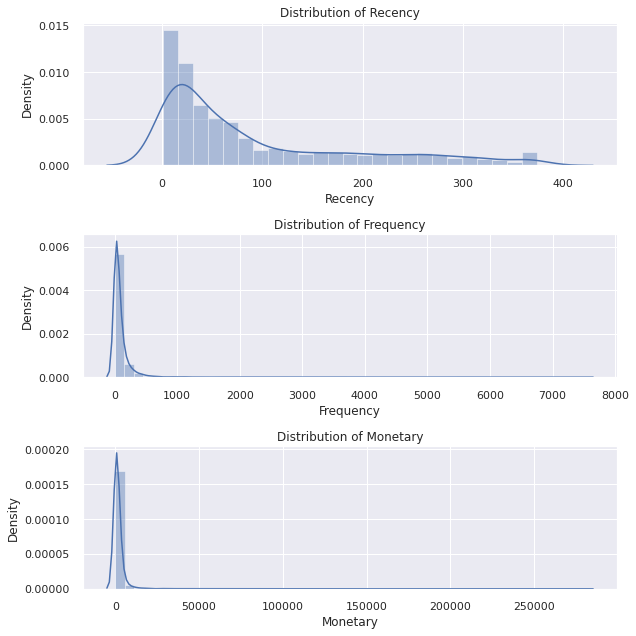

In [ ]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(rfm_df,'Recency')

plt.subplot(3, 1, 2)
check_skew(rfm_df,'Frequency')

plt.subplot(3, 1, 3)
check_skew(rfm_df,'Monetary')

plt.tight_layout()
# plt.savefig('before_transform.png', format='png', dpi=1000)

**Removing Skewness**

In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

Recency's: Skew: -0.5539163020068809, : SkewtestResult(statistic=-13.968391843280067, pvalue=2.4305297860916617e-44)
Frequency's: Skew: -0.21822522642703573, : SkewtestResult(statistic=-5.811072263917291, pvalue=6.207395941499347e-09)
Monetary's: Skew: 0.35367147660374587, : SkewtestResult(statistic=9.253271323912841, pvalue=2.1772486762265053e-20)


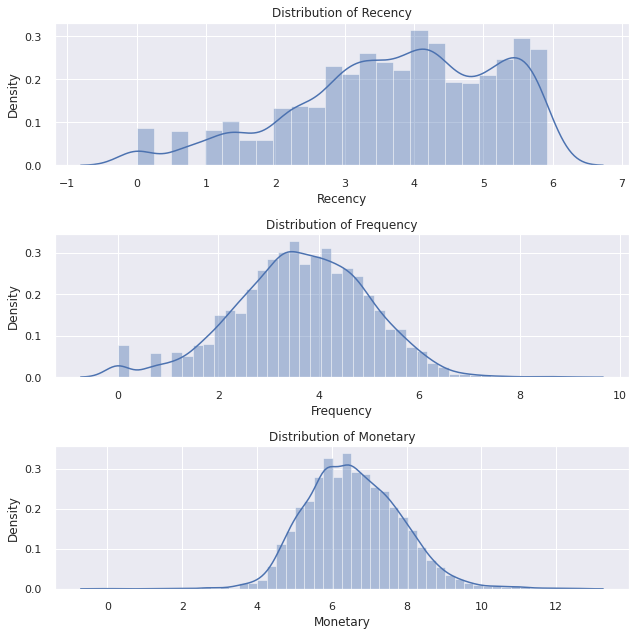

In [ ]:
# Check for skewness after log transformation
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(Log_Tfd_Data,'Recency')

plt.subplot(3, 1, 2)
check_skew(Log_Tfd_Data,'Frequency')

plt.subplot(3, 1, 3)
check_skew(Log_Tfd_Data,'Monetary')

plt.tight_layout()

Split into four segments using quantiles

In [ ]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,18.0,17.0,305.190
0.50,51.0,40.0,664.000
0.75,142.0,97.0,1650.265


In [ ]:
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 97.0},
 'Monetary': {0.25: 305.19, 0.5: 664.0, 0.75: 1650.265}}

In [ ]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,19,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [ ]:

#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,326,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,19,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [ ]:
rfm_df_scaled = pd.DataFrame()

In [ ]:
rfm_df_scaled["Recency"] = np.log(rfm_df.Recency)
rfm_df_scaled["Frequency"] = np.log(rfm_df.Frequency)
rfm_df_scaled["Monetary"] = np.log(rfm_df.Monetary)

In [ ]:
rfm_df_scaled.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.786897,0.000000,11.253942
12347.0,0.693147,5.204007,8.368693
12348.0,4.317488,3.433987,7.494007
12349.0,2.944439,4.290459,7.471676
12350.0,5.736572,2.833213,5.812338


#**Model Building**

##Kmeans Clustering

In [ ]:
Kmeans_model = rfm_df_scaled.copy()

In [ ]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Kmeans_model)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(Kmeans_model, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.39413633544128285
For n_clusters=3, the silhouette score is 0.30243255278174563
For n_clusters=4, the silhouette score is 0.3070462285987702
For n_clusters=5, the silhouette score is 0.2810981014622284
For n_clusters=6, the silhouette score is 0.28155539648780337
For n_clusters=7, the silhouette score is 0.27198045920466163
For n_clusters=8, the silhouette score is 0.2673919034923972


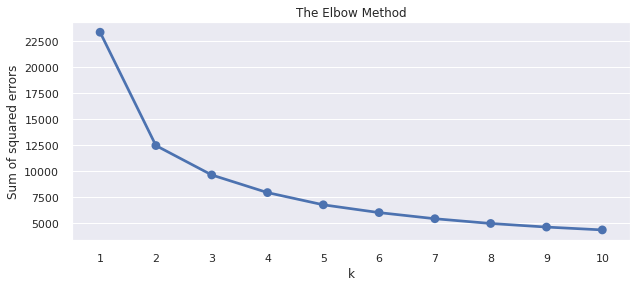

In [ ]:
### Features Used in training K Means - Log Transformed Recency, Frequency and Monetary values
data_norm = Kmeans_model[["Recency", "Frequency", "Monetary"]]

sse = {}
# Fit KMeans and calculate SSE for each k
for k in range(1, 11):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(data_norm)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_
    
# Plotting the elbow plot
plt.figure(figsize=(10,4))
plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

From the above plot, we can see that the optimal number of clusters can be taken as 3. Now I am building the K Means model using 3 clusters.

In [ ]:
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, random_state=1)
kmeans.fit(data_norm)
Kmeans_model["cluster"] = kmeans.predict(data_norm)

In [ ]:
Kmeans_model.head()

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12346.0,5.786897,0.000000,11.253942,1
12347.0,0.693147,5.204007,8.368693,2
12348.0,4.317488,3.433987,7.494007,1
12349.0,2.944439,4.290459,7.471676,1
12350.0,5.736572,2.833213,5.812338,0


Checking Mean RFM values in different clusters to understand cluster properties

In [ ]:
Kmeans_model.groupby(["cluster"])[['Recency','Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
cluster,,,
0,4.872435,2.389950,5.435638
1,3.815818,3.962120,6.761971
2,1.948716,5.082502,8.018419


Text(0, 0.5, 'Monetary')

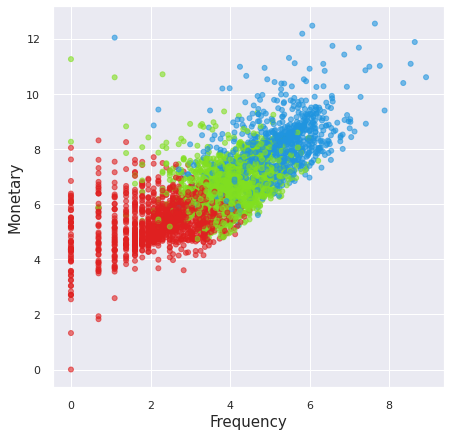

In [ ]:
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

## add to dataframe
Kmeans_model['cen_x'] = Kmeans_model.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
Kmeans_model['cen_y'] = Kmeans_model.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
Kmeans_model['c'] = Kmeans_model.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

# Plot clusters
plt.figure(figsize=(7,7))
plt.scatter(Kmeans_model.Frequency, Kmeans_model.Monetary, c=Kmeans_model.c, alpha = 0.6, s=25)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Monetary', fontsize=15)

Text(0, 0.5, 'Monetary')

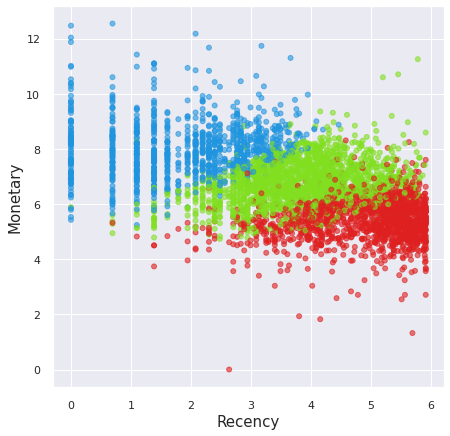

In [ ]:
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

## add to dataframe
Kmeans_model['cen_x'] = Kmeans_model.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
Kmeans_model['cen_y'] = Kmeans_model.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
Kmeans_model['c'] = Kmeans_model.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

# Plot clusters
plt.figure(figsize=(7,7))
plt.scatter(Kmeans_model.Recency, Kmeans_model.Monetary, c=Kmeans_model.c, alpha = 0.6, s=25)
plt.xlabel('Recency', fontsize=15)
plt.ylabel('Monetary', fontsize=15)